In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/Users/asim/Downloads/SkincareSurveyData_10k.csv",parse_dates = True)

In [ ]:
df

In [3]:
#used the maping function to set the yes or no because otherwise it would have unstabled the data 
# so i ccame uo with the assumption with 3 because the yes can be interpreted as 5 or 1 so i came with a middle score
important_skincare = {'1':1 , '2':2,'3':3,'4':4,'5':5,'Yes':3 , 'No':0}

In [4]:
# using map function to assume yes means 3 because of avg and no means 0
df['Do you agree that skincare is important ?']= df['Do you agree that skincare is important ?'].map(important_skincare)

In [6]:
df['Do you agree that skincare is important ?']

0       3
1       5
2       5
3       4
4       3
       ..
9995    4
9996    3
9997    5
9998    3
9999    2
Name: Do you agree that skincare is important ?, Length: 10000, dtype: int64

In [11]:
df.columns


Index(['Timestamp', 'Gender', 'Age', 'Race', 'Occupation',
       'Do you agree that skincare is important ?',
       'Have you ever used any skin care products?',
       'Which, if any, of the following statements applies to you?',
       'Which of the following types of ingredients would make you more likely to buy a skin care product?',
       'How do/did you choose your products?',
       'Do you use samples before buying skincare products?',
       'How often do you buy skincare products?',
       'How willing are you to try different skin care products?',
       'Where do you purchase your skin care products?',
       'On average, how much do you spend on skincare products each month?',
       'I wasting to much time to find out skincare and routine that suits my skin.',
       'I being doubtful about the information shared by influencers and brand promoted content.',
       'I feel difficult to understand the list of ingredients on the products.',
       'I bought expensive prod

In [98]:
#df['Which of the following types of ingredients would make you more likely to buy a skin care product?']

In [94]:
#df['I wasting to much time to find out skincare and routine that suits my skin.'].unique

In [92]:
#df['I feel difficult to understand the list of ingredients on the products.'].unique

In [90]:
#df["I bought expensive product but doesn't see any improvement on my skin."].unique

In [88]:
#df['I unaware of which ingredients is the best or to avoid according my skin type.'].unique

In [86]:
#df['I want to gain knowledge of skincare regime in easy and understandable way.'].unique

In [84]:
#df['I want to adapt a healthy lifestyle for a glowing and healthy skin.']

In [13]:
# made a top 10 product column but i made a mistake by doing head 10
df['top 10 choose product']= df['How do/did you choose your products?'].head(10)
df

,Timestamp,Gender,Age,Race,Occupation,Do you agree that skincare is important ?,Have you ever used any skin care products?,"Which, if any, of the following statements applies to you?",Which of the following types of ingredients would make you more likely to buy a skin care product?,How do/did you choose your products?,...,I want have solutions from expert in effortless and cheap way.,I want to have my personalized skincare routine that suitable with my current products.,I want to gain knowledge of skincare regime in easy and understandable way.,I want to adapt a healthy lifestyle for a glowing and healthy skin.,Do you think that technology can improve your skincare routine?,Do you have heard about AI (Artificial Intelligent)?,"After you know about AI, do you want to have a skin scanning app that can customize skincare regime?",Do you feel excited to use this skincare application?,Do share your skincare goals and motivation with us!,top 10 choose product
0,4/3/2022 14:26,Female,27,African,Architect,3,Yes,I have pigmentation;I have a combination skin ...,Noncomedogenic ingredients (ingredients that d...,Brand;Pricing;Product's ingredients,...,5,2,1,3,No,No,Yes,3,To achieve a more luminous and radiant complexion,Brand;Pricing;Product's ingredients
1,3/23/2022 7:19,Female,15-20,Indian,Consultant,5,Yes,I have sensitive skin;I have pigmentation;I st...,Natural ingredients;Alcohol-free ingredients;O...,Friend/Relative recommendation;Brand;Product's...,...,2,4,5,4,No,Yes,No,1,"Simple routine, high quality, cheap & less tim...",Friend/Relative recommendation;Brand;Product's...
2,11/19/2022 4:01,Female,34,Korean,Manager,5,Yes,I have pigmentation;I have dry and dull skin;I...,Natural ingredients;Noncomedogenic ingredients...,Friend/Relative recommendation;Dermatologist's...,...,1,4,4,5,Yes,Yes,No,1,To maintain clear skin and prevent future brea...,Friend/Relative recommendation;Dermatologist's...
3,11/9/2022 7:23,Male,29,Korean,Software Engineer,4,No,I have pigmentation;I struggle with acne and b...,Natural ingredients;Dye-free ingredients,Brand;Pricing,...,3,3,4,4,No,Yes,No,5,To enhance the effectiveness of my skincare ro...,Brand;Pricing
4,6/26/2022 18:07,Female,35-40,Bumiputra Sabah (Bajau),Teacher,3,No,I have oily skin;I struggle with acne and brea...,Natural ingredients;Noncomedogenic ingredients...,Dermatologist's advice;Product's ingredients,...,2,1,1,2,No,No,No,4,To address specific concerns like dark circles...,Dermatologist's advice;Product's ingredients
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,8/18/2022 0:44,Male,31,Korean,Retired,4,Yes,I have dry and dull skin;I have an uneven skin...,Natural ingredients;Petroleum-free ingredients,Friend/Relative recommendation;Brand;Pricing,...,5,1,4,2,No,No,No,4,To address hyperpigmentation and achieve a bri...,NaN
9996,7/18/2022 7:38,Male,35,Bumiputra Sabah (Bajau),Employee,3,No,I struggle with acne and breakout;I suffer fro...,Natural ingredients;Hypoallergenic ingredients,"Brand;Advertising and marketing ( Tiktok, Face...",...,4,4,5,4,No,Yes,No,4,No bearing at all,NaN
9997,9/18/2022 12:14,Male,>35,Arabian,Designer,5,Yes,I have pigmentation;I have a combination skin ...,Natural ingredients;Fragrance-free ingredients...,Brand;Dermatologist's advice;Pricing;Product's...,...,5,1,5,1,No,No,Yes,4,Less is more,NaN
9998,9/8/2022 3:10,Female,20-25,Libyan,Employee,3,Yes,I have oily skin;I struggle with acne and brea...,Natural ingredients;Oil-free ingredients;Exfol...,Friend/Relative recommendation;Brand;Pricing;P...,...,2,1,3,3,No,Yes,No,2,To achieve a healthy skin barrier and prevent ...,NaN


In [15]:
#converted timestamp column to date time format properly 
df['Timestamp'] = pd.to_datetime(df['Timestamp'],format = '%m/%d/%Y %M:%S')

In [17]:
# made a new column for monthly reviews
df['reviews_per_month'] = df['Timestamp'].dt.month

In [19]:
# for review per hour 
df['review_per_hour'] = df['Timestamp'].dt.hour

<Figure size 1200x1200 with 0 Axes>

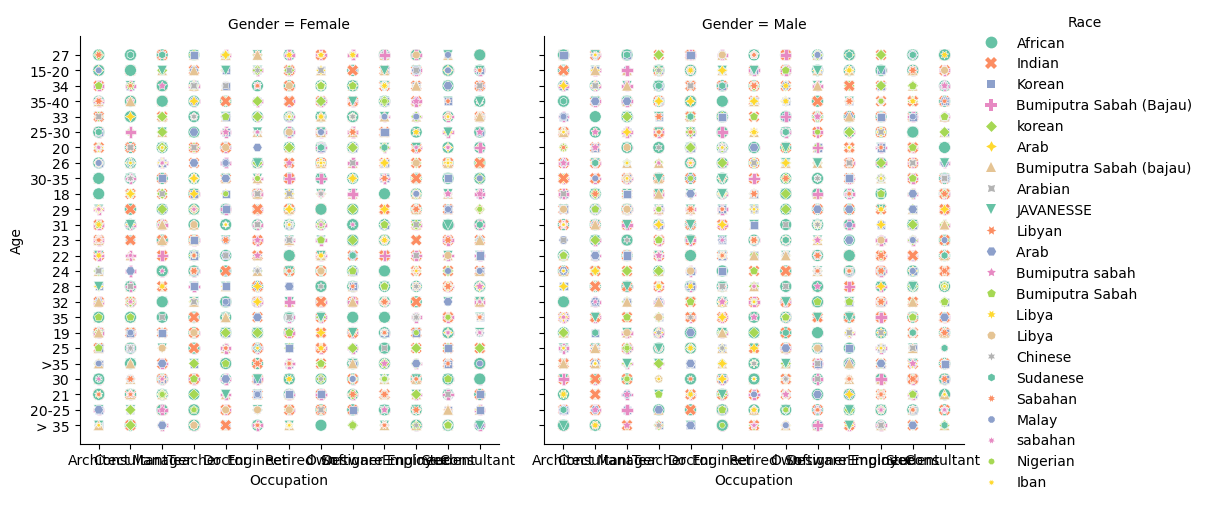

In [379]:
#tried relplot for the first time after learning
plt.figure(figsize = (12,12))
sns.relplot(data = df , x = 'Occupation' , y = 'Age' , col = 'Gender' , hue = 'Race' , style = 'Race' , palette = 'Set2' , size = 'Race')

In [167]:
# used group by function to find relation between the below data
b = df.groupby(['Occupation', 'Race', 'Age'])['Gender'].value_counts().unstack().fillna(0)
b['Total'] = b.sum(axis=1)
b = b.sort_values(by='Total', ascending=False).reset_index()

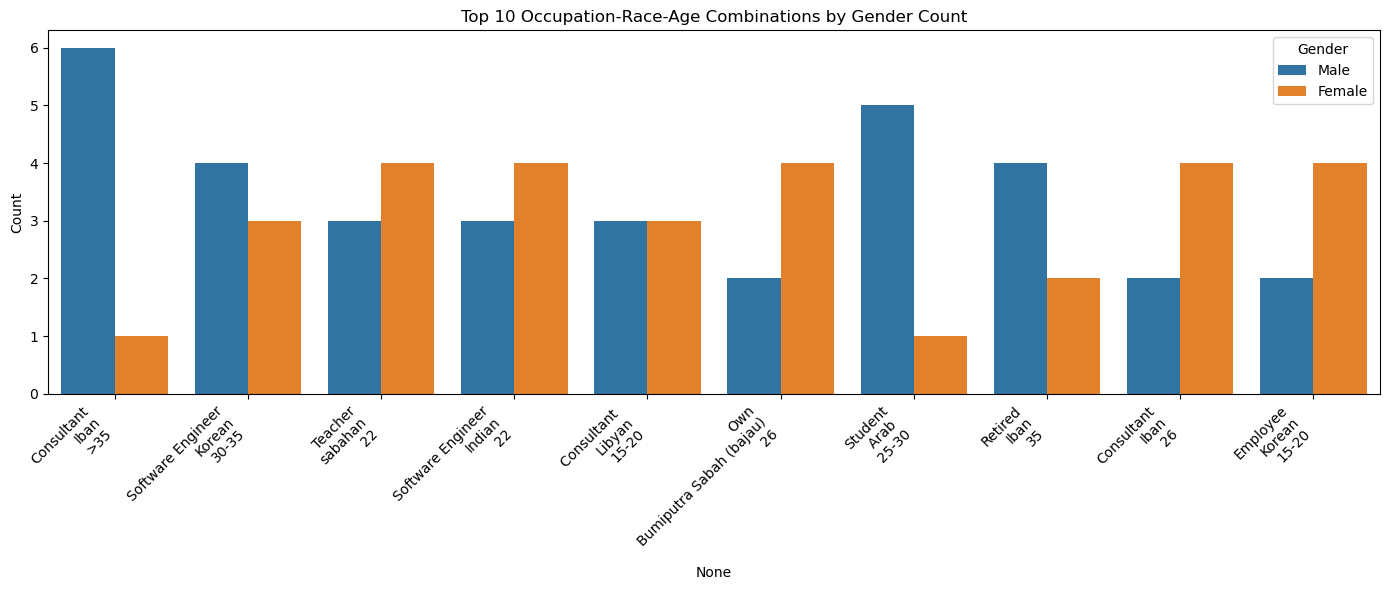

In [169]:
top_n = b.head(10)  # Pick top 10 combinations

# Plotting Male vs Female counts side-by-side
top_n_plot = top_n.melt(id_vars=['Occupation', 'Race', 'Age'], 
                        value_vars=['Male', 'Female'], 
                        var_name='Gender', value_name='Count')

plt.figure(figsize=(14, 6))
sns.barplot(data=top_n_plot, 
            x=top_n_plot.apply(lambda x: f"{x['Occupation']}\n{x['Race']}\n{x['Age']}", axis=1), 
            y='Count', hue='Gender')
plt.title("Top 10 Occupation-Race-Age Combinations by Gender Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [171]:
df

,Timestamp,Gender,Age,Race,Occupation,Do you agree that skincare is important ?,Have you ever used any skin care products?,"Which, if any, of the following statements applies to you?",Which of the following types of ingredients would make you more likely to buy a skin care product?,How do/did you choose your products?,...,I want to adapt a healthy lifestyle for a glowing and healthy skin.,Do you think that technology can improve your skincare routine?,Do you have heard about AI (Artificial Intelligent)?,"After you know about AI, do you want to have a skin scanning app that can customize skincare regime?",Do you feel excited to use this skincare application?,Do share your skincare goals and motivation with us!,top 10 choose product,reviews_per_month,review_per_hour,reviews_per_day
0,2022-04-03 00:14:26,Female,27,African,Architect,3,Yes,I have pigmentation;I have a combination skin ...,Noncomedogenic ingredients (ingredients that d...,Brand;Pricing;Product's ingredients,...,3,No,No,Yes,3,To achieve a more luminous and radiant complexion,Brand;Pricing;Product's ingredients,4,0,0
1,2022-03-23 00:07:19,Female,15-20,Indian,Consultant,5,Yes,I have sensitive skin;I have pigmentation;I st...,Natural ingredients;Alcohol-free ingredients;O...,Friend/Relative recommendation;Brand;Product's...,...,4,No,Yes,No,1,"Simple routine, high quality, cheap & less tim...",Friend/Relative recommendation;Brand;Product's...,3,0,0
2,2022-11-19 00:04:01,Female,34,Korean,Manager,5,Yes,I have pigmentation;I have dry and dull skin;I...,Natural ingredients;Noncomedogenic ingredients...,Friend/Relative recommendation;Dermatologist's...,...,5,Yes,Yes,No,1,To maintain clear skin and prevent future brea...,Friend/Relative recommendation;Dermatologist's...,11,0,0
3,2022-11-09 00:07:23,Male,29,Korean,Software Engineer,4,No,I have pigmentation;I struggle with acne and b...,Natural ingredients;Dye-free ingredients,Brand;Pricing,...,4,No,Yes,No,5,To enhance the effectiveness of my skincare ro...,Brand;Pricing,11,0,0
4,2022-06-26 00:18:07,Female,35-40,Bumiputra Sabah (Bajau),Teacher,3,No,I have oily skin;I struggle with acne and brea...,Natural ingredients;Noncomedogenic ingredients...,Dermatologist's advice;Product's ingredients,...,2,No,No,No,4,To address specific concerns like dark circles...,Dermatologist's advice;Product's ingredients,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2022-08-18 00:00:44,Male,31,Korean,Retired,4,Yes,I have dry and dull skin;I have an uneven skin...,Natural ingredients;Petroleum-free ingredients,Friend/Relative recommendation;Brand;Pricing,...,2,No,No,No,4,To address hyperpigmentation and achieve a bri...,NaN,8,0,0
9996,2022-07-18 00:07:38,Male,35,Bumiputra Sabah (Bajau),Employee,3,No,I struggle with acne and breakout;I suffer fro...,Natural ingredients;Hypoallergenic ingredients,"Brand;Advertising and marketing ( Tiktok, Face...",...,4,No,Yes,No,4,No bearing at all,NaN,7,0,0
9997,2022-09-18 00:12:14,Male,>35,Arabian,Designer,5,Yes,I have pigmentation;I have a combination skin ...,Natural ingredients;Fragrance-free ingredients...,Brand;Dermatologist's advice;Pricing;Product's...,...,1,No,No,Yes,4,Less is more,NaN,9,0,0
9998,2022-09-08 00:03:10,Female,20-25,Libyan,Employee,3,Yes,I have oily skin;I struggle with acne and brea...,Natural ingredients;Oil-free ingredients;Exfol...,Friend/Relative recommendation;Brand;Pricing;P...,...,3,No,Yes,No,2,To achieve a healthy skin barrier and prevent ...,NaN,9,0,0


In [173]:
# made a used skincare variable to use mapping 
used_skincare = {'Yes':1,'No':0}

In [175]:
# used the map function to interpret data by integer Yes means 1 no means 0
df['Have you ever used any skin care products?']= df['Have you ever used any skin care products?'].map(important_skincare)



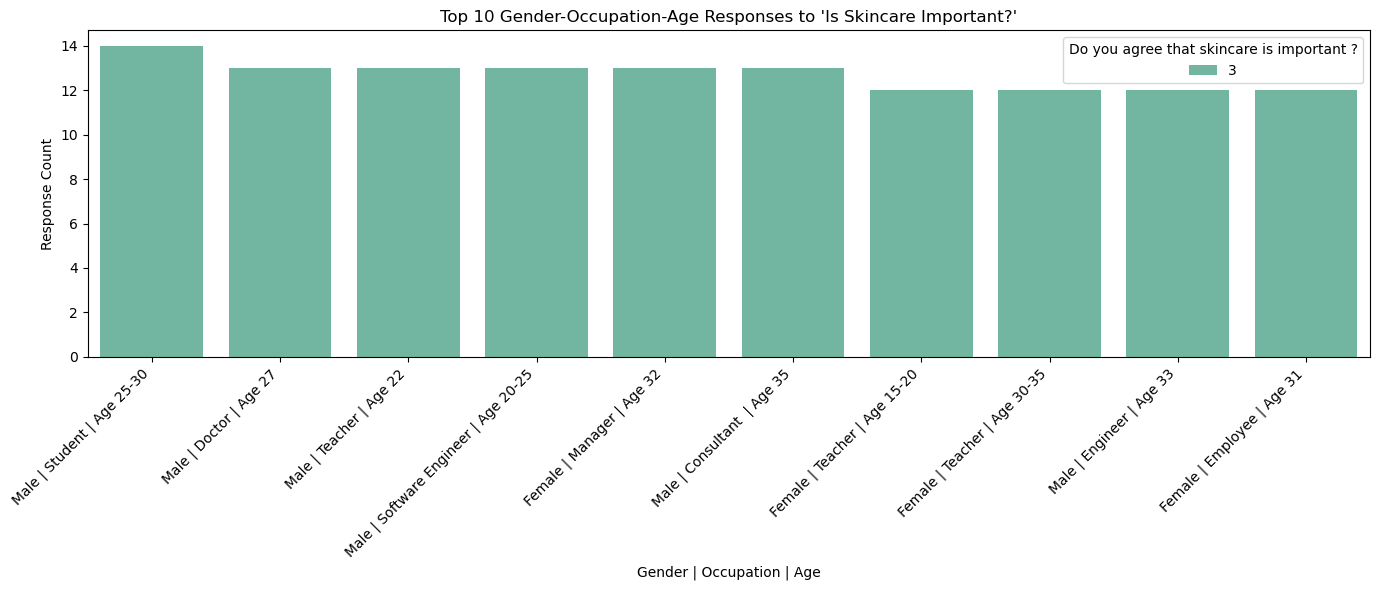

In [225]:
# used group by funnction to find relation between gender occupation age and with do you agree with the skincare is important
# first time lesrned the lambda function when to use when there are alot of columns in groupby
b = df.groupby(['Gender', 'Occupation', 'Age'])['Do you agree that skincare is important ?']\
     .value_counts().reset_index(name='Count')\
     .sort_values(by='Count', ascending=False).head(10)

b['Label'] = b.apply(lambda row: f"{row['Gender']} | {row['Occupation']} | Age {row['Age']}", axis=1)


plt.figure(figsize=(14, 6))
sns.barplot(
    data=b,
    x='Label',
    y='Count',
    hue='Do you agree that skincare is important ?',
    palette='Set2')
plt.title("Top 10 Gender-Occupation-Age Responses to 'Is Skincare Important?'")
plt.xlabel("Gender | Occupation | Age")
plt.ylabel("Response Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [214]:
# relation between Gender ,age , top 10 choose product


In [303]:
# used groupby to find the relation between gender occupation age and how did you choose your product means by channel
c = df.groupby(['Gender','Occupation','Age'])['How do/did you choose your products?'].value_counts()\
.reset_index(name = 'Count').sort_values(by = 'Count',ascending = False)\
.head(10)


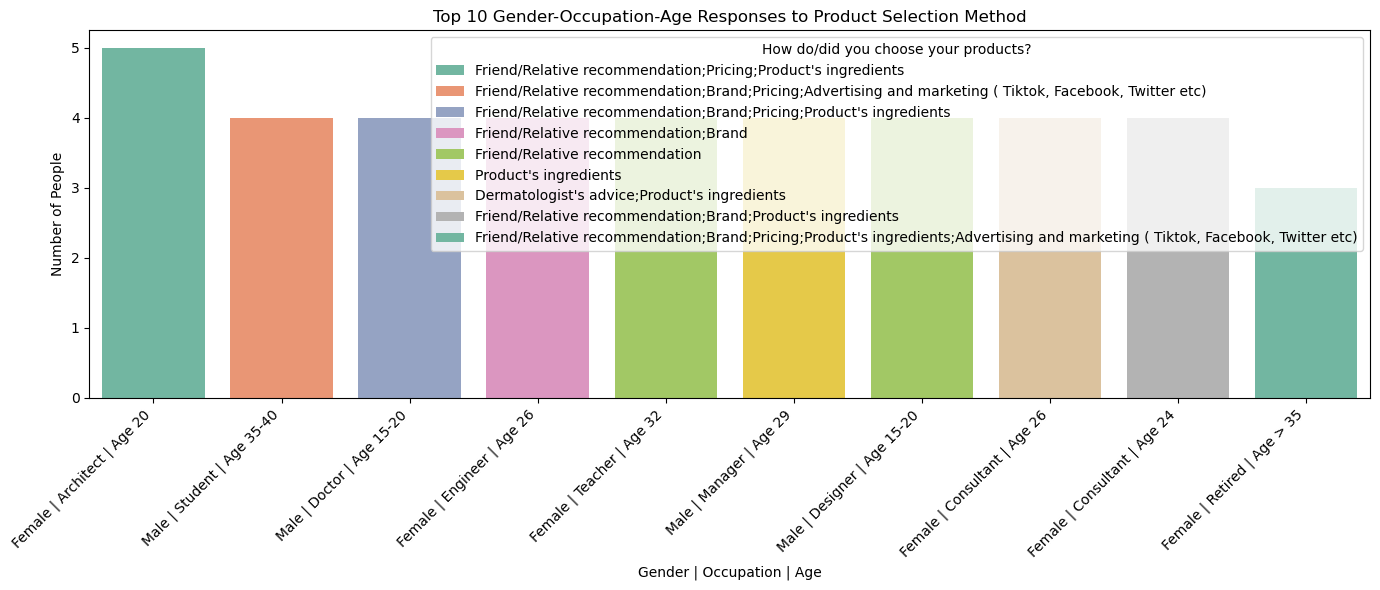

In [307]:

c['Label'] = c.apply(lambda row: f"{row['Gender']} | {row['Occupation']} | Age {row['Age']}", axis=1)

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(
    data=c,
    x='Label',
    y='Count',
    hue='How do/did you choose your products?',
    palette='Set2'
)
plt.title("Top 10 Gender-Occupation-Age Responses to Product Selection Method")
plt.xlabel("Gender | Occupation | Age")
plt.ylabel("Number of People")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [315]:
# Grouping the data with gender age race occuopation, Do you agree that skincare is important ?', Have you ever used any skin care products
                          'Have you ever used any skin care products?' 
relation_df = df.groupby(['Gender', 'Age', 'Race', 'Occupation', 
                          'Do you agree that skincare is important ?', 
                          'Have you ever used any skin care products?'])\
                .size().reset_index(name='Count')

# Show the top combinations by count
relation_df.sort_values(by='Count', ascending=False).head(10)

,Gender,Age,Race,Occupation,Do you agree that skincare is important ?,Have you ever used any skin care products?,Count
6611,Male,25,Nigerian,Manager,3,3,4
809,Female,20-25,Chinese,Manager,3,3,3
8390,Male,33,Bumiputra Sabah,Employee,3,3,3
3798,Female,34,Bumiputra Sabah,Doctor,3,0,3
7648,Male,30,Bumiputra Sabah (Bajau),Architect,3,0,3
7896,Male,30-35,JAVANESSE,Engineer,5,0,3
2060,Female,26,Arabian,Teacher,2,3,3
7364,Male,28,Libyan,Engineer,2,0,3
231,Female,18,Bumiputra Sabah (Bajau),Designer,3,0,3
9434,Male,>35,JAVANESSE,Teacher,3,3,3


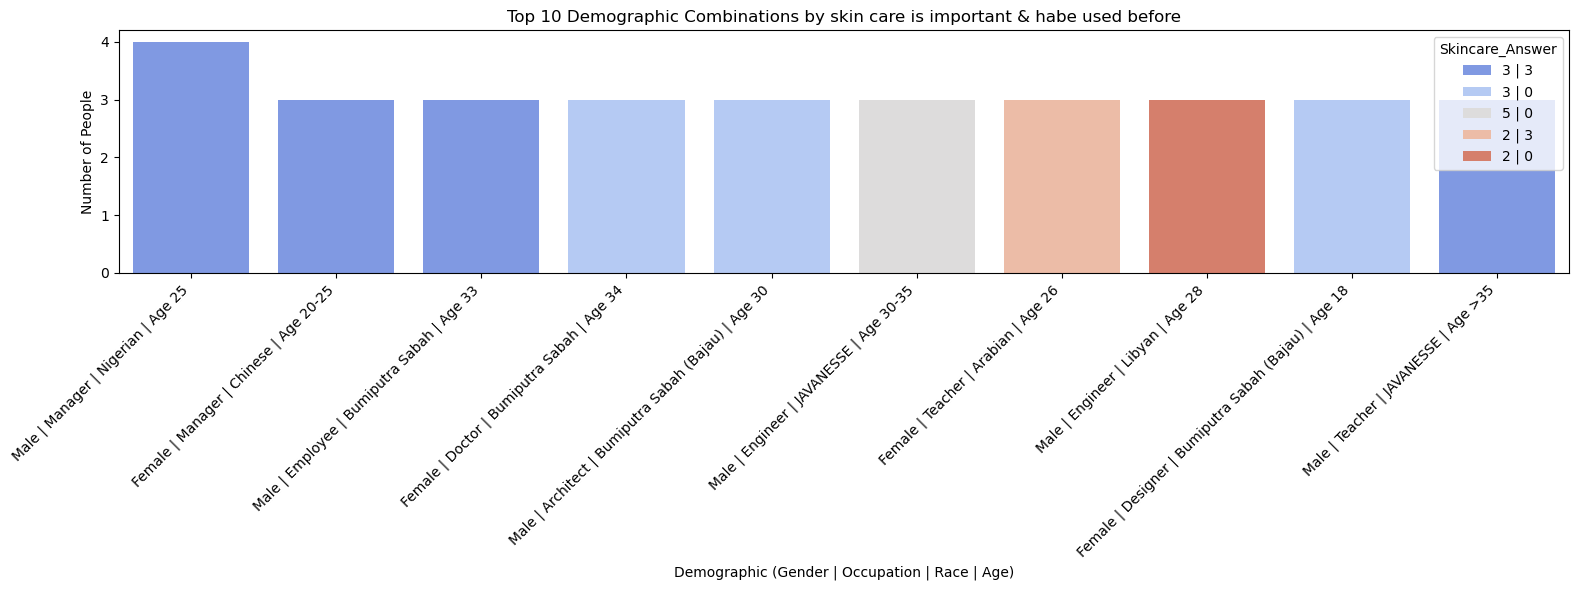

In [323]:
relation_df['Skincare_Answer'] = relation_df['Do you agree that skincare is important ?'].astype(str) + " | " + relation_df['Have you ever used any skin care products?'].astype(str)

# Create a condensed label
relation_df['Label'] = relation_df.apply(lambda row: f"{row['Gender']} | {row['Occupation']} | {row['Race']} | Age {row['Age']}", axis=1)

# Plot top combinations
top_combos = relation_df.sort_values(by='Count', ascending=False).head(10)

plt.figure(figsize=(16, 6))
sns.barplot(data=top_combos, x='Label', y='Count', hue='Skincare_Answer', palette='coolwarm')
plt.title("Top 10 Demographic Combinations by skin care is important & habe used before")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Demographic (Gender | Occupation | Race | Age)")
plt.ylabel("Number of People")
plt.tight_layout()
plt.show()

In [325]:
from statsmodels.tsa.seasonal import seasonal_decompose

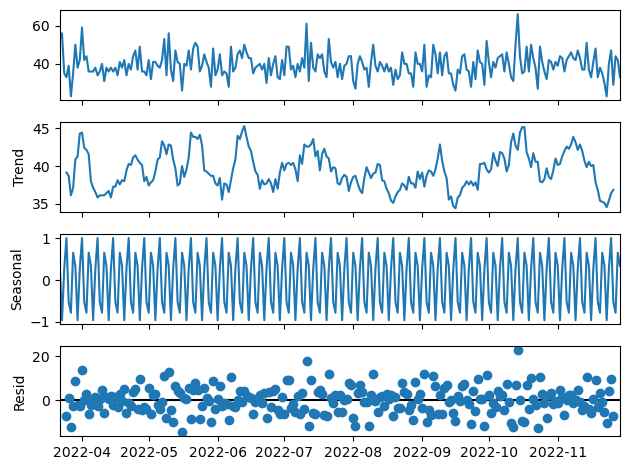

In [551]:
#resampled data into daily and showed trend , seasonal  and resid seasonal decomposition
ts = df.set_index('Timestamp').resample('D').size()

result = seasonal_decompose(ts, model='additive')

result.plot()
plt.show()

In [333]:
# finding the relation between gender age race occupation and if i want to adop a healthy lifestlye
grouped = df.groupby(['Gender', 'Age', 'Race', 'Occupation', 
                      'I want to adapt a healthy lifestyle for a glowing and healthy skin.'])\
            .size().reset_index(name='Count')

# Sort and preview
grouped.sort_values(by='Count', ascending=False).head(10)

,Gender,Age,Race,Occupation,I want to adapt a healthy lifestyle for a glowing and healthy skin.,Count
6477,Male,25-30,African,Student,3,4
4068,Female,35-40,Bumiputra Sabah,Retired,5,3
9278,Male,>35,korean,Employee,3,3
4810,Male,18,Bumiputra Sabah,Consultant,3,3
9209,Male,>35,JAVANESSE,Teacher,2,3
1313,Female,23,Arab,Teacher,2,3
8716,Male,35,Sudanese,Retired,3,3
2304,Female,27,Sabahan,Engineer,2,3
8966,Male,> 35,Arabian,Student,4,3
8873,Male,35-40,Libya,Own,4,3


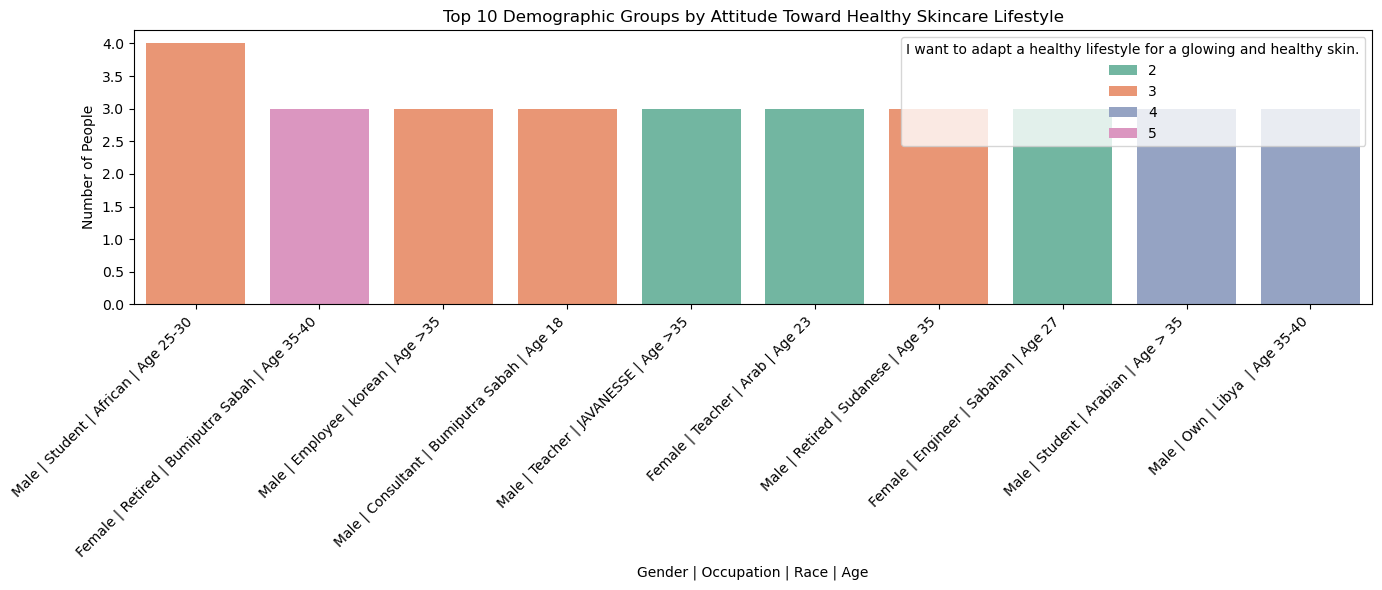

In [337]:
grouped['Label'] = grouped.apply(lambda row: f"{row['Gender']} | {row['Occupation']} | {row['Race']} | Age {row['Age']}", axis=1)

# Take top 10 combinations by count
top10 = grouped.sort_values(by='Count', ascending=False).head(10)


plt.figure(figsize=(14, 6))
sns.barplot(data=top10, x='Label', y='Count', hue='I want to adapt a healthy lifestyle for a glowing and healthy skin.', palette='Set2')
plt.title("Top 10 Demographic Groups by Attitude Toward Healthy Skincare Lifestyle")
plt.xlabel("Gender | Occupation | Race | Age")
plt.ylabel("Number of People")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [382]:
df


,Timestamp,Gender,Age,Race,Occupation,Do you agree that skincare is important ?,Have you ever used any skin care products?,"Which, if any, of the following statements applies to you?",Which of the following types of ingredients would make you more likely to buy a skin care product?,How do/did you choose your products?,...,I want to adapt a healthy lifestyle for a glowing and healthy skin.,Do you think that technology can improve your skincare routine?,Do you have heard about AI (Artificial Intelligent)?,"After you know about AI, do you want to have a skin scanning app that can customize skincare regime?",Do you feel excited to use this skincare application?,Do share your skincare goals and motivation with us!,top 10 choose product,reviews_per_month,review_per_hour,reviews_per_day
0,2022-04-03 00:14:26,Female,27,African,Architect,3,3,I have pigmentation;I have a combination skin ...,Noncomedogenic ingredients (ingredients that d...,Brand;Pricing;Product's ingredients,...,3,No,No,Yes,3,To achieve a more luminous and radiant complexion,Brand;Pricing;Product's ingredients,4,0,0
1,2022-03-23 00:07:19,Female,15-20,Indian,Consultant,5,3,I have sensitive skin;I have pigmentation;I st...,Natural ingredients;Alcohol-free ingredients;O...,Friend/Relative recommendation;Brand;Product's...,...,4,No,Yes,No,1,"Simple routine, high quality, cheap & less tim...",Friend/Relative recommendation;Brand;Product's...,3,0,0
2,2022-11-19 00:04:01,Female,34,Korean,Manager,5,3,I have pigmentation;I have dry and dull skin;I...,Natural ingredients;Noncomedogenic ingredients...,Friend/Relative recommendation;Dermatologist's...,...,5,Yes,Yes,No,1,To maintain clear skin and prevent future brea...,Friend/Relative recommendation;Dermatologist's...,11,0,0
3,2022-11-09 00:07:23,Male,29,Korean,Software Engineer,4,0,I have pigmentation;I struggle with acne and b...,Natural ingredients;Dye-free ingredients,Brand;Pricing,...,4,No,Yes,No,5,To enhance the effectiveness of my skincare ro...,Brand;Pricing,11,0,0
4,2022-06-26 00:18:07,Female,35-40,Bumiputra Sabah (Bajau),Teacher,3,0,I have oily skin;I struggle with acne and brea...,Natural ingredients;Noncomedogenic ingredients...,Dermatologist's advice;Product's ingredients,...,2,No,No,No,4,To address specific concerns like dark circles...,Dermatologist's advice;Product's ingredients,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2022-08-18 00:00:44,Male,31,Korean,Retired,4,3,I have dry and dull skin;I have an uneven skin...,Natural ingredients;Petroleum-free ingredients,Friend/Relative recommendation;Brand;Pricing,...,2,No,No,No,4,To address hyperpigmentation and achieve a bri...,0,8,0,0
9996,2022-07-18 00:07:38,Male,35,Bumiputra Sabah (Bajau),Employee,3,0,I struggle with acne and breakout;I suffer fro...,Natural ingredients;Hypoallergenic ingredients,"Brand;Advertising and marketing ( Tiktok, Face...",...,4,No,Yes,No,4,No bearing at all,0,7,0,0
9997,2022-09-18 00:12:14,Male,>35,Arabian,Designer,5,3,I have pigmentation;I have a combination skin ...,Natural ingredients;Fragrance-free ingredients...,Brand;Dermatologist's advice;Pricing;Product's...,...,1,No,No,Yes,4,Less is more,0,9,0,0
9998,2022-09-08 00:03:10,Female,20-25,Libyan,Employee,3,3,I have oily skin;I struggle with acne and brea...,Natural ingredients;Oil-free ingredients;Exfol...,Friend/Relative recommendation;Brand;Pricing;P...,...,3,No,Yes,No,2,To achieve a healthy skin barrier and prevent ...,0,9,0,0


In [384]:
# making a function for Do you think that technology can improve your skincare routine?
# so the yes can be 1 and no can be 2
technology_skincare = {'Yes':1 , 'No':0}

In [394]:
df['Do you think that technology can improve your skincare routine?'] = df['Do you think that technology can improve your skincare routine?']\
.map(technology_skincare)

In [400]:
#making a function for Do you have heard about AI (Artificial Intelligent)? 
# yes = 1 no = 0 for easy data analysis
heard_ai = {'Yes':1 , 'No':0}

In [402]:
df['Do you have heard about AI (Artificial Intelligent)?'] = df['Do you have heard about AI (Artificial Intelligent)?']\
.map(head_ai)

0       0
1       1
2       1
3       1
4       0
       ..
9995    0
9996    1
9997    0
9998    1
9999    1
Name: Do you have heard about AI (Artificial Intelligent)?, Length: 10000, dtype: int64

In [406]:
scanning_app = {'Yes':1 , 'No':0}

In [408]:
df['After you know about AI, do you want to have a skin scanning app that can customize skincare regime?']=\
df['After you know about AI, do you want to have a skin scanning app that can customize skincare regime?'].map(scanning_app)

0       1
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    0
9999    0
Name: After you know about AI, do you want to have a skin scanning app that can customize skincare regime?, Length: 10000, dtype: int64

In [446]:
grouping_ai = df.groupby(['Gender', 'Age', 'Race', 'Occupation','Do you agree that skincare is important ?',
'Do you think that technology can improve your skincare routine?','Do you have heard about AI (Artificial Intelligent)?',
'After you know about AI, do you want to have a skin scanning app that can customize skincare regime?',
'Do you feel excited to use this skincare application?']).size().sort_values(ascending = False).reset_index(name='count')

In [448]:
grouping_ai

,Gender,Age,Race,Occupation,Do you agree that skincare is important ?,Do you think that technology can improve your skincare routine?,Do you have heard about AI (Artificial Intelligent)?,"After you know about AI, do you want to have a skin scanning app that can customize skincare regime?",Do you feel excited to use this skincare application?,count
0,Male,35,Libyan,Teacher,3,0,1,0,2,2
1,Male,22,Indian,Engineer,3,1,0,0,4,2
2,Female,29,sabahan,Software Engineer,4,0,0,1,1,2
3,Female,20,Sudanese,Own,2,1,0,0,1,2
4,Male,20-25,Libya,Doctor,5,1,0,0,5,2
...,...,...,...,...,...,...,...,...,...,...
9979,Female,30-35,Sudanese,Software Engineer,4,1,0,1,2,1
9980,Female,30-35,korean,Consultant,3,1,1,0,3,1
9981,Female,30-35,korean,Consultant,5,0,1,1,3,1
9982,Female,30-35,korean,Employee,3,1,1,1,4,1


In [465]:
interested_ai  = grouping_ai[grouping_ai['After you know about AI, do you want to have a skin scanning app that can customize skincare regime?']== 1]
interested_ai['label'] = interested_ai.apply(lambda x: f"{x['Gender']} | {x['Occupation']} | {x['Race']} | Age {x['Age']}" , axis = 1)

/var/folders/jb/ccj4203j0ds9pntq6q78mq9c0000gn/T/ipykernel_45020/2380738051.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interested_ai['label'] = interested_ai.apply(lambda x: f"{x['Gender']} | {x['Occupation']} | {x['Race']} | Age {x['Age']}" , axis = 1)


/var/folders/jb/ccj4203j0ds9pntq6q78mq9c0000gn/T/ipykernel_45020/3093270052.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = interested_ai.sort_values(by = 'count' , ascending = False).head(10) , x = 'label' , y = 'count' , palette = 'Set1')


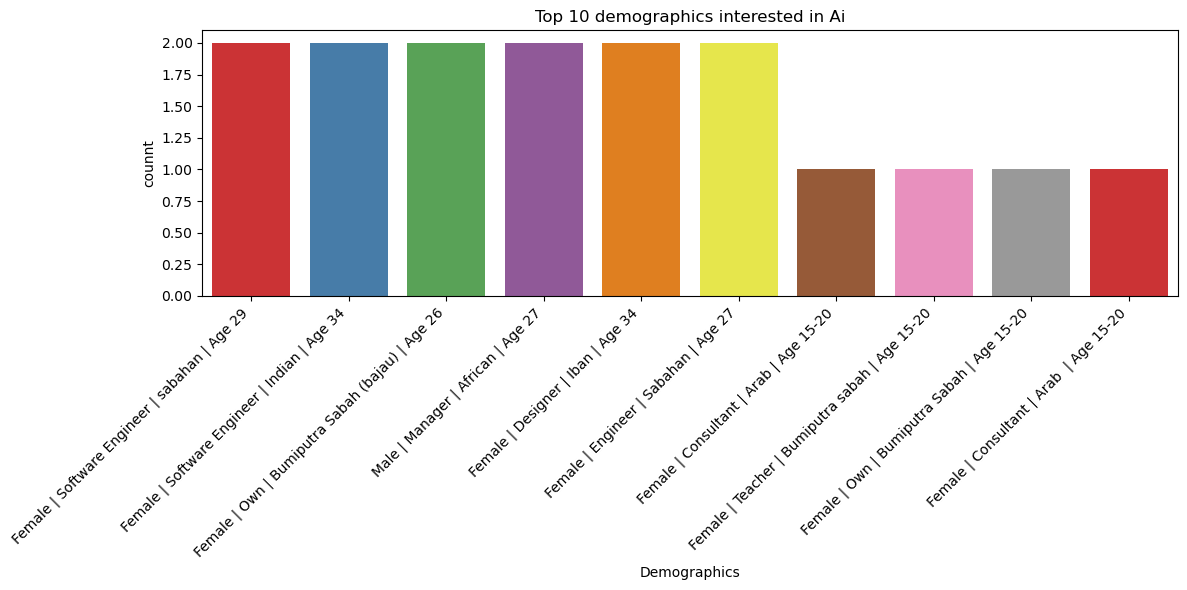

In [476]:
# the plot figure will show those who had interest in ai 
plt.figure(figsize = (12,6))
sns.barplot(data = interested_ai.sort_values(by = 'count' , ascending = False).head(10) , x = 'label' , y = 'count' , palette = 'Set1')
plt.title('Top 10 demographics interested in Ai')
plt.xlabel('Demographics')
plt.ylabel('counnt')
plt.xticks(rotation = 45 , ha = 'right')
plt.tight_layout()
plt.show()

In [518]:
excitement_vs_usage = df.groupby(['Gender','Occupation','Race','Age','Do you agree that skincare is important ?','Do you feel excited to use this skincare application?']).size()\
.reset_index(name='count')

In [544]:
 sorted_excitement_vs_usage= excitement_vs_usage.sort_values(by ='count',ascending = False).head(10)

In [534]:
sorted_excitement_vs_usage['label']= sorted_excitement_vs_usage.apply(lambda x : f"{x['Gender']} | {x['Race']}\
,{x['Occupation']},Age {x['Age']}", axis = 1)


/var/folders/jb/ccj4203j0ds9pntq6q78mq9c0000gn/T/ipykernel_45020/597052814.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sorted_excitement_vs_usage, x = 'label' , y = 'count' , palette = 'coolwarm',errorbar = None)


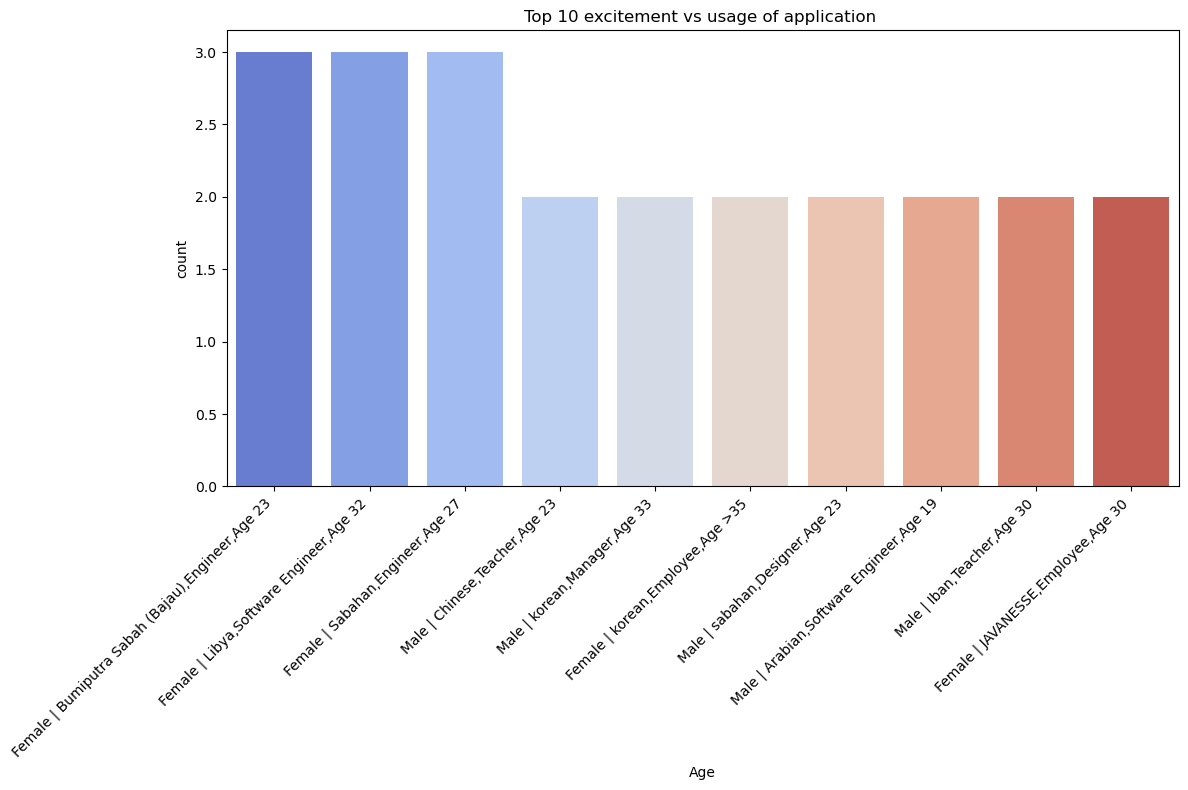

In [542]:
plt.figure(figsize = (12,8))
sns.barplot(data = sorted_excitement_vs_usage, x = 'label' , y = 'count' , palette = 'coolwarm',errorbar = None)
plt.title('Top 10 excitement vs usage of application ')
plt.xlabel('Age')
plt.ylabel('count')
plt.xticks(rotation = 45 , ha = 'right')
plt.tight_layout()
plt.show()


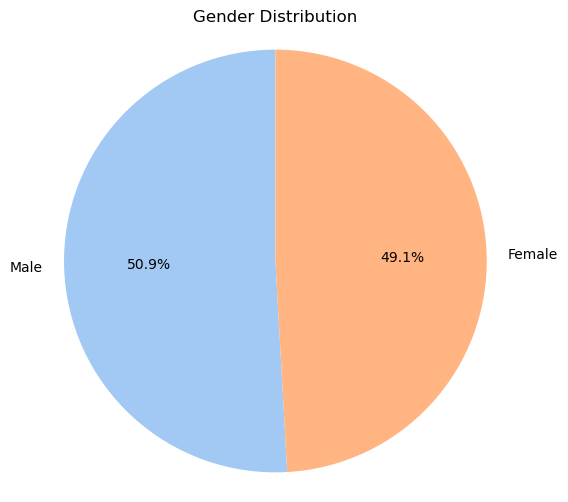

In [549]:
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

In [553]:
df

,Timestamp,Gender,Age,Race,Occupation,Do you agree that skincare is important ?,Have you ever used any skin care products?,"Which, if any, of the following statements applies to you?",Which of the following types of ingredients would make you more likely to buy a skin care product?,How do/did you choose your products?,...,I want to adapt a healthy lifestyle for a glowing and healthy skin.,Do you think that technology can improve your skincare routine?,Do you have heard about AI (Artificial Intelligent)?,"After you know about AI, do you want to have a skin scanning app that can customize skincare regime?",Do you feel excited to use this skincare application?,Do share your skincare goals and motivation with us!,top 10 choose product,reviews_per_month,review_per_hour,reviews_per_day
0,2022-04-03 00:14:26,Female,27,African,Architect,3,3,I have pigmentation;I have a combination skin ...,Noncomedogenic ingredients (ingredients that d...,Brand;Pricing;Product's ingredients,...,3,0,0,1,3,To achieve a more luminous and radiant complexion,Brand;Pricing;Product's ingredients,4,0,0
1,2022-03-23 00:07:19,Female,15-20,Indian,Consultant,5,3,I have sensitive skin;I have pigmentation;I st...,Natural ingredients;Alcohol-free ingredients;O...,Friend/Relative recommendation;Brand;Product's...,...,4,0,1,0,1,"Simple routine, high quality, cheap & less tim...",Friend/Relative recommendation;Brand;Product's...,3,0,0
2,2022-11-19 00:04:01,Female,34,Korean,Manager,5,3,I have pigmentation;I have dry and dull skin;I...,Natural ingredients;Noncomedogenic ingredients...,Friend/Relative recommendation;Dermatologist's...,...,5,1,1,0,1,To maintain clear skin and prevent future brea...,Friend/Relative recommendation;Dermatologist's...,11,0,0
3,2022-11-09 00:07:23,Male,29,Korean,Software Engineer,4,0,I have pigmentation;I struggle with acne and b...,Natural ingredients;Dye-free ingredients,Brand;Pricing,...,4,0,1,0,5,To enhance the effectiveness of my skincare ro...,Brand;Pricing,11,0,0
4,2022-06-26 00:18:07,Female,35-40,Bumiputra Sabah (Bajau),Teacher,3,0,I have oily skin;I struggle with acne and brea...,Natural ingredients;Noncomedogenic ingredients...,Dermatologist's advice;Product's ingredients,...,2,0,0,0,4,To address specific concerns like dark circles...,Dermatologist's advice;Product's ingredients,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2022-08-18 00:00:44,Male,31,Korean,Retired,4,3,I have dry and dull skin;I have an uneven skin...,Natural ingredients;Petroleum-free ingredients,Friend/Relative recommendation;Brand;Pricing,...,2,0,0,0,4,To address hyperpigmentation and achieve a bri...,0,8,0,0
9996,2022-07-18 00:07:38,Male,35,Bumiputra Sabah (Bajau),Employee,3,0,I struggle with acne and breakout;I suffer fro...,Natural ingredients;Hypoallergenic ingredients,"Brand;Advertising and marketing ( Tiktok, Face...",...,4,0,1,0,4,No bearing at all,0,7,0,0
9997,2022-09-18 00:12:14,Male,>35,Arabian,Designer,5,3,I have pigmentation;I have a combination skin ...,Natural ingredients;Fragrance-free ingredients...,Brand;Dermatologist's advice;Pricing;Product's...,...,1,0,0,1,4,Less is more,0,9,0,0
9998,2022-09-08 00:03:10,Female,20-25,Libyan,Employee,3,3,I have oily skin;I struggle with acne and brea...,Natural ingredients;Oil-free ingredients;Exfol...,Friend/Relative recommendation;Brand;Pricing;P...,...,3,0,1,0,2,To achieve a healthy skin barrier and prevent ...,0,9,0,0


In [586]:
top_10_spend= df.groupby(['Gender','Age','Race','Occupation','Do you agree that skincare is important ?',
       'Have you ever used any skin care products?','On average, how much do you spend on skincare products each month?'])\
.size().reset_index(name = 'count').sort_values(by = 'On average, how much do you spend on skincare products each month?' , ascending = False)\
.head(10)

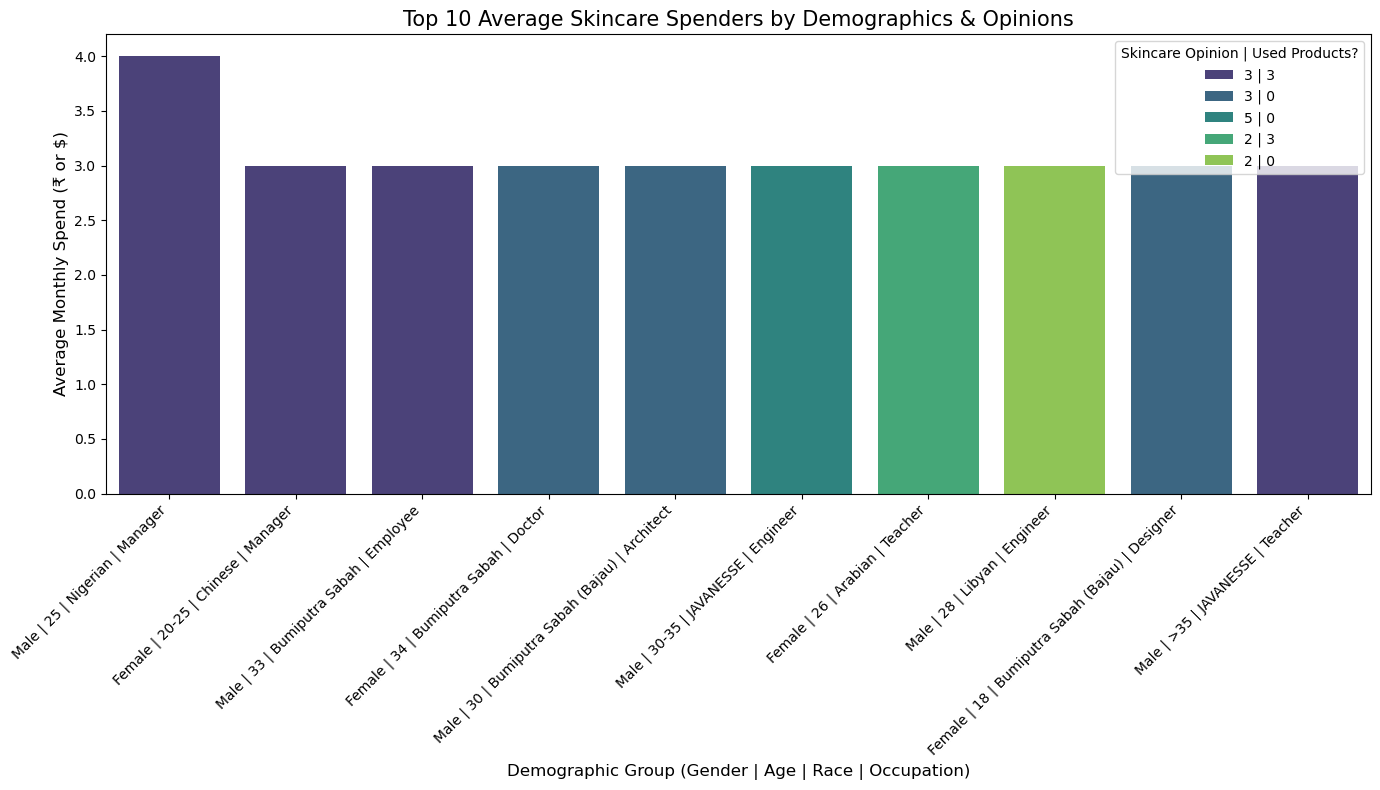

In [602]:

df['Skincare_Opinion'] = df['Do you agree that skincare is important ?'].astype(str) + " | " + df['Have you ever used any skin care products?'].astype(str)


spend_summary = df.groupby([
    'Gender', 'Age', 'Race', 'Occupation', 'Skincare_Opinion'
])['On average, how much do you spend on skincare products each month?'].size().reset_index()


top_10_spend = spend_summary.sort_values(by='On average, how much do you spend on skincare products each month?', ascending=False).head(10)


top_10_spend['label'] = top_10_spend.apply(
    lambda x: f"{x['Gender']} | {x['Age']} | {x['Race']} | {x['Occupation']}", axis=1
)

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(
    data=top_10_spend,
    x='label',
    y='On average, how much do you spend on skincare products each month?',
    hue='Skincare_Opinion',
    palette='viridis'
)

# Styling
plt.title("Top 10 Average Skincare Spenders by Demographics & Opinions", fontsize=15)
plt.xlabel("Demographic Group (Gender | Age | Race | Occupation)", fontsize=12)
plt.ylabel("Average Monthly Spend (₹ or $)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Skincare Opinion | Used Products?")
plt.tight_layout()
plt.show()